**Основные цели и задачи проекта.**

Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике

**Краткая информация о данных.**

* school — аббревиатура школы, в которой учится ученик
* sex — пол ученика
* age — возраст ученика
* address — тип адреса ученика
* famsize — размер семьи
* Pstatus — статус совместного жилья родителей
* Medu — образование матери
* Fedu — образование отца
* Mjob — работа матери
* Fjob — работа отца
* reason — причина выбора школы
* guardian — опекун
* traveltime — время в пути до школы
* studytime — время на учёбу помимо школы в неделю
* failures — количество внеучебных неудач
* schoolsup — дополнительная образовательная поддержка
* famsup — семейная образовательная поддержка
* paid — дополнительные платные занятия по математике
* activities — дополнительные внеучебные занятия
* nursery — посещал детский сад
* higher — хочет получить высшее образование
* internet — наличие интернета дома
* romantic — в романтических отношениях
* famrel — семейные отношения
* freetime — свободное время после школы
* goout — проведение времени с друзьями
* health — текущее состояние здоровья
* absences — количество пропущенных занятий
* score — баллы по госэкзамену по математике

**Этапы работы над проектом.**
* Первичная обработка данных.
* Просмотр распределения признаков для числовых переменных.
* Устранение выбросов.
* Оценка количества уникальных значений для номинативных переменных.
* Преобразование данные.
* Корреляционный анализ количественных переменных.
* Отбор некоррелирующих переменных.
* Анализ номинативных переменных.
* Устранение малозначимых номинативных.
* Формулировка выводов.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import boxcox
from itertools import combinations

In [2]:
math = pd.read_csv('stud_math.csv')

# Переименование граф

In [3]:
math = math.rename(columns={'Pstatus': 'pstatus',
                            'Medu': 'medu',
                            'Fedu': 'fedu',
                            'Mjob': 'mjob',
                            'Fjob': 'fjob'
                            })

In [4]:
math

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [5]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   pstatus              350 non-null    object 
 6   medu                 392 non-null    float64
 7   fedu                 371 non-null    float64
 8   mjob                 376 non-null    object 
 9   fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [6]:
math.describe()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [7]:
math.describe(include=['object'])

,school,sex,address,famsize,pstatus,mjob,fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


# Функции

# Перечень значений по столбцу

In [8]:
def meanings():
    for each in math.columns:
        print(f'Значения в колонке {each}:', math[each].unique())

# Перечень столбцов заданного типа

In [9]:
def type_data(kind):
    return math.select_dtypes(kind).columns

# Стобцы с пропусками более 10%

In [10]:
def count_nan():
    for each in math.columns:
        percent_null = math[each].isnull().sum()/len(math.index)
        if percent_null > 0.1:
            print(each, "{:.1%}".format(percent_null))
        if percent_null > 0.3:
            print(f'Показетель {each} удалить, так как пропусков больше 30%')

# Мода для данных типа object 

In [11]:
def mode_obj(column):
    return math.describe(include=['object'])[column]['top']

# Гистограмма распределения признаков

In [12]:
def hist_type(kind):
    fig = plt.figure(figsize=[10, 70])
    count = 1
    for each in math.select_dtypes(kind).columns:
        ax = fig.add_subplot(16, 2, count)
        sns.countplot(x=each, data=math)
        count += 1

# Графичекое изображение аномалий

In [13]:
def graph_out(kind):
    fig = plt.figure(figsize=[10, 50])
    count = 1
    for each in math.select_dtypes(kind).columns:
        ax = fig.add_subplot(15, 2, count)
        plt.title(each)

        perc25 = math[each].quantile(0.25)
        perc75 = math[each].quantile(0.75)
        IQR = perc75 - perc25

        math[each].loc[math[each].between(
            perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(label='IQR')
        math[each].loc[(math[each] < perc25 - 1.5*IQR) |
                       (math[each] > perc75 + 1.5*IQR)].hist(label='выбросы')

        count += 1

        plt.legend()

In [14]:
"""mark - наименование показателя
perc25 - 25-й перцентиль
perc75 - 75-й перцентиль
iqr - межквартильный размах
right - правая граница промежутка с данными без аномалий
left - левая граница промежутка с данными без аномалий
uniq_outliers - количество уникальных отклонений
count_outliers - количество отклонений

"""


def table_out():
    info_out = pd.DataFrame(columns=['mark', 'perc25', 'perc75',
                                     'iqr', 'left', 'right',
                                     'uniq_outliers', 'count_outliers'])

    info_out.mark = pd.Series(math.select_dtypes('int64').columns)

    for each, i in zip(info_out.mark, range(info_out.shape[0])):
        perc25 = math[each].quantile(0.25)
        perc75 = math[each].quantile(0.75)
        IQR = perc75 - perc25

        info_out.perc25[i] = pd.Series([perc25])[0]
        info_out.perc75[i] = pd.Series([perc75])[0]

        info_out.uniq_outliers[i] = pd.Series(math[each].loc[
            (math[each] < perc25 - 1.5*IQR) |
            (math[each] > perc75 + 1.5*IQR)].nunique())[0]

        info_out.count_outliers[i] = pd.Series(math[each].loc[
            (math[each] < perc25 - 1.5*IQR) |
            (math[each] > perc75 + 1.5*IQR)].count())[0]

    info_out.iqr = info_out.perc75 - info_out.perc25
    info_out.left = info_out.perc25 - 1.5*info_out.iqr
    info_out.right = info_out.perc75 + 1.5*info_out.iqr

    return info_out

# Удаление выбросов

In [15]:
# """В конечном варианте функция не использовалась,
# так как удаление различных вариаций колонок увеличивает
# коэффициенты корреляцию не белее, чем на 2%.
#
# """
# for each in columns:
#     perc25 = math[each].quantile(0.25)
#     perc75 = math[each].quantile(0.75)
#     IQR = perc75 - perc25
#     math = math.loc[math[each].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

# Нормализация

In [16]:
"""В конечном варианте функция не использовалась,
так как такая нормализация не уменьшила аномалии.

"""


def norm_boxcoc():
    poitive_math = math.select_dtypes(
        'int64').loc[:, math.select_dtypes('int64').gt(0).all()]
    for each in poitive_math.columns:
        math[each] = boxcox(math[each].values)[0]

# Построение boxplot для отдельных типов данных

In [17]:
"""kind - тип данных в столбце
a,b - срез для перечня столбцов

"""


def boxplot_type(kind, a=0, b=100):
    for each in math.select_dtypes(kind).columns[a:b]:
        fig, ax = plt.subplots(figsize=(8, 4))
        sns.boxplot(x=each, y='score', data=math, ax=ax)
        ax.set_title('Boxplot for ' + each)
        plt.show()

# Частота категориальных параметров

In [18]:
def info_object():
    for each in math.select_dtypes('object').columns:
        series = pd.DataFrame(math[each].value_counts())
        uniq = math[each].nunique()
        display(series)
        print('Уникальных значений:', uniq)

# Проверка t-Стьюдента

In [19]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'],
                     math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Поправка Бонферони
            print('Найдены статистически значимые различия для ', column)
            break

# Поиск и удаление дубликатов

In [20]:
math.shape

(395, 30)

In [21]:
math = math.drop_duplicates()

In [22]:
math.shape

(395, 30)

# Проверка и корректировка содержимого в столбцах

In [23]:
meanings()

Значения в колонке school: ['GP' 'MS']
Значения в колонке sex: ['F' 'M']
Значения в колонке age: [18 17 15 16 19 22 20 21]
Значения в колонке address: ['U' nan 'R']
Значения в колонке famsize: [nan 'GT3' 'LE3']
Значения в колонке pstatus: ['A' nan 'T']
Значения в колонке medu: [ 4.  1.  3.  2. nan  0.]
Значения в колонке fedu: [ 4.  1.  2.  3. 40. nan  0.]
Значения в колонке mjob: ['at_home' 'health' 'other' 'services' 'teacher' nan]
Значения в колонке fjob: ['teacher' 'other' nan 'health' 'services' 'at_home']
Значения в колонке reason: ['course' 'other' 'home' 'reputation' nan]
Значения в колонке guardian: ['mother' 'father' 'other' nan]
Значения в колонке traveltime: [ 2.  1.  3. nan  4.]
Значения в колонке studytime: [ 2.  3.  1. nan  4.]
Значения в колонке failures: [ 0.  3. nan  2.  1.]
Значения в колонке schoolsup: ['yes' 'no' nan]
Значения в колонке famsup: ['no' 'yes' nan]
Значения в колонке paid: ['no' nan 'yes']
Значения в колонке activities: ['no' 'yes' nan]
Значения в коло

In [24]:
"""Замена fedu = 40 на моду."""
math.loc[math.fedu == 40, 'fedu'] = math.fedu.mode()[0]

In [25]:
"""Замена famrel = -1 на медиану."""
math.loc[math.famrel == -1, 'famrel'] = math.famrel.mode()[0]

# Заполнение и удаление пропусков

In [26]:
"""Проверка количества незаполненных строк в каждой графе."""
math.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
pstatus                45
medu                    3
fedu                   24
mjob                   19
fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [27]:
"""Удаление строк, где в целевом параметре (score) нет данных."""
math.dropna(axis=0, subset=['score'], inplace=True)

In [28]:
math.shape  # Проверка размерности

(389, 30)

In [29]:
count_nan()  # Столбцы, по которым пустых значений больше 10%

pstatus 11.6%
paid 10.0%


In [30]:
math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   pstatus              344 non-null    object 
 6   medu                 386 non-null    float64
 7   fedu                 365 non-null    float64
 8   mjob                 370 non-null    object 
 9   fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

In [31]:
"""Заполнение пропусков absences, как непрерывной величины,
на медиану.  Начало именно с этого параметра,
так как он единственный некатегориальный параметр
с пропусками типа float.

"""
math.absences = math.absences.fillna(math.absences.median())

In [32]:
"""Заполнение пропусков категориальных переменных
с типом float на моду.

"""
for each in type_data('float64'):
    math[each] = math[each].fillna(math[each].mode()[0])

In [33]:
"""Заполнение пропусков категориальных переменных
с типом object на моду.

"""
for each in type_data('object'):
    math[each] = math[each].fillna(mode_obj(each))

In [34]:
math.info()  # Проверка заполнения пропусков

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              389 non-null    object 
 4   famsize              389 non-null    object 
 5   pstatus              389 non-null    object 
 6   medu                 389 non-null    float64
 7   fedu                 389 non-null    float64
 8   mjob                 389 non-null    object 
 9   fjob                 389 non-null    object 
 10  reason               389 non-null    object 
 11  guardian             389 non-null    object 
 12  traveltime           389 non-null    float64
 13  studytime            389 non-null    float64
 14  failures             389 non-null    float64
 15  schoolsup            389 non-null    obj

In [35]:
"""Замена данных с типом float на целочисленные значения."""
for each in type_data('float64'):
    math[each] = math[each].astype('int64')

In [36]:
math.info()  # Проверка изменения типа данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   school               389 non-null    object
 1   sex                  389 non-null    object
 2   age                  389 non-null    int64 
 3   address              389 non-null    object
 4   famsize              389 non-null    object
 5   pstatus              389 non-null    object
 6   medu                 389 non-null    int64 
 7   fedu                 389 non-null    int64 
 8   mjob                 389 non-null    object
 9   fjob                 389 non-null    object
 10  reason               389 non-null    object
 11  guardian             389 non-null    object
 12  traveltime           389 non-null    int64 
 13  studytime            389 non-null    int64 
 14  failures             389 non-null    int64 
 15  schoolsup            389 non-null    object
 16  famsup  

# Анализ численных данных

# Диаграммы признаков

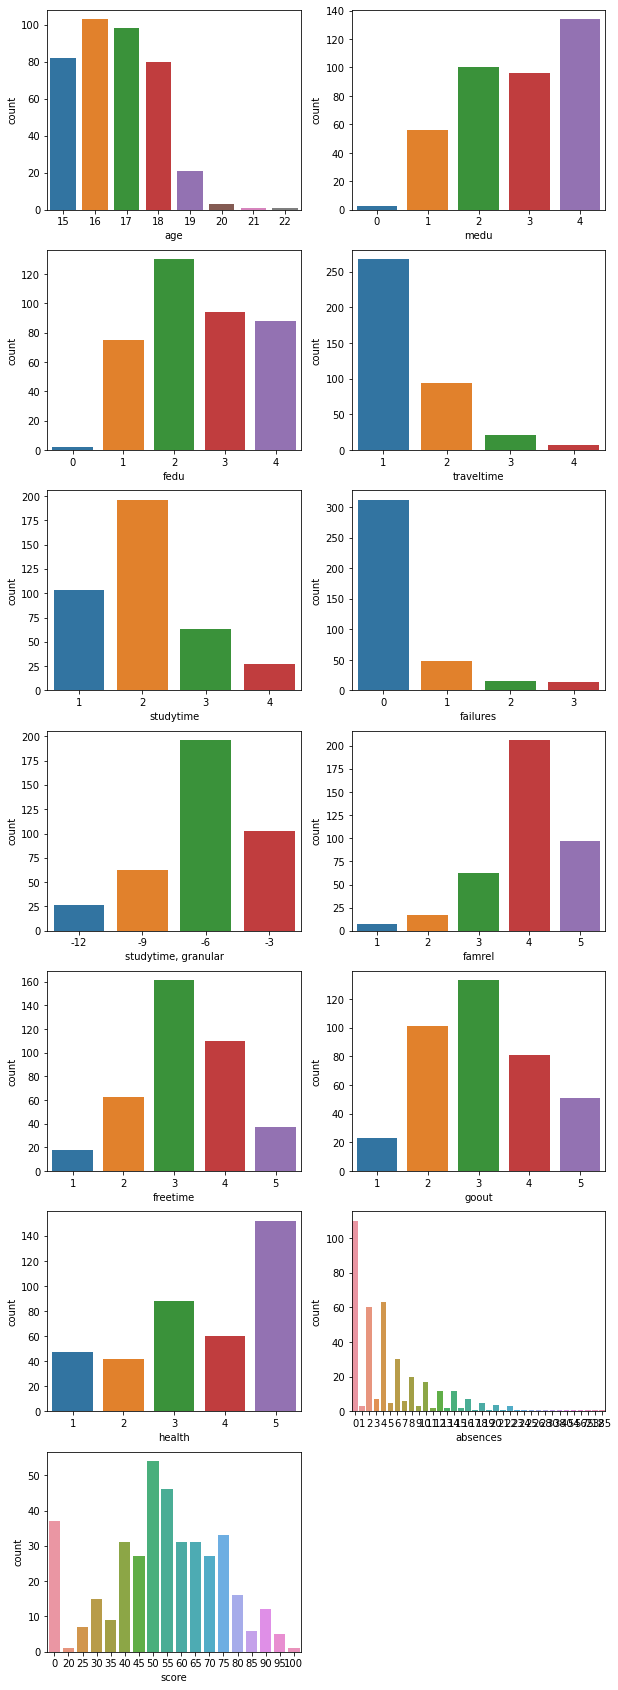

In [37]:
hist_type('int64')

Text(0.5, 1.0, 'Количество пропущенных занятий')

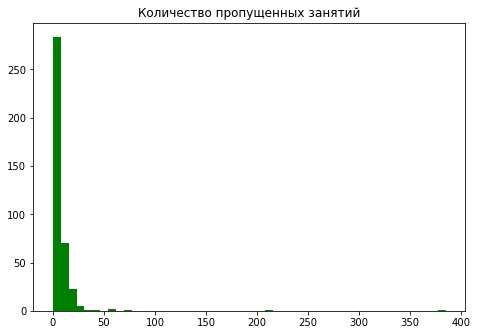

In [38]:
"""Отдельный график для количества пропущенных занятий,
как для показателя с большим количеством вариант.

"""
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(math.absences, bins=50, color='green')
axes.set_title('Количество пропущенных занятий')

Text(0.5, 1.0, 'Баллы по госэкзамену по математике')

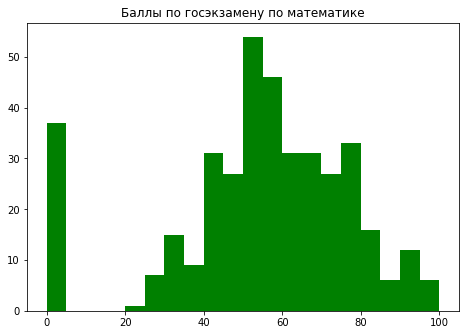

In [39]:
"""Отдельный график для оценки за экзамен ,
как для показателя с большим количеством вариант.

"""

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(math.score, bins=20, color='green')
axes.set_title('Баллы по госэкзамену по математике')

# Выявление выбросов

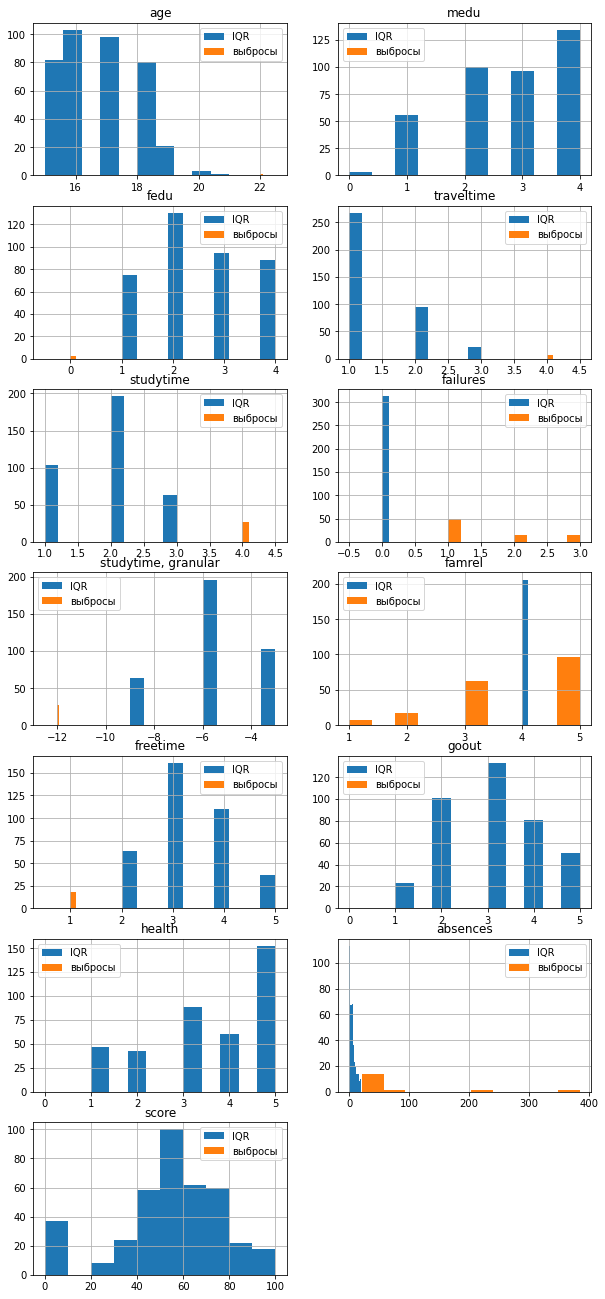

In [40]:
graph_out('int64')

In [41]:
table_out()

,mark,perc25,perc75,iqr,left,right,uniq_outliers,count_outliers
0,age,16.0,18.0,2.0,13.0,21.0,1,1
1,medu,2.0,4.0,2.0,-1.0,7.0,0,0
2,fedu,2.0,3.0,1.0,0.5,4.5,1,2
3,traveltime,1.0,2.0,1.0,-0.5,3.5,1,7
4,studytime,1.0,2.0,1.0,-0.5,3.5,1,27
5,failures,0.0,0.0,0.0,0.0,0.0,3,77
6,"studytime, granular",-6.0,-3.0,3.0,-10.5,1.5,1,27
7,famrel,4.0,4.0,0.0,4.0,4.0,4,183
8,freetime,3.0,4.0,1.0,1.5,5.5,1,18
9,goout,2.0,4.0,2.0,-1.0,7.0,0,0


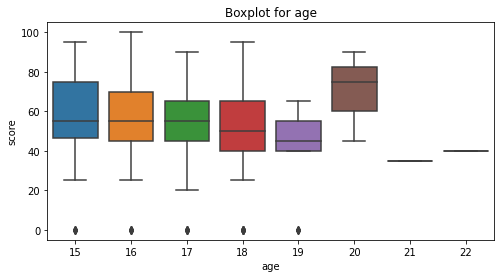

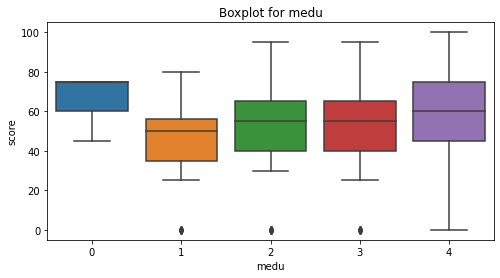

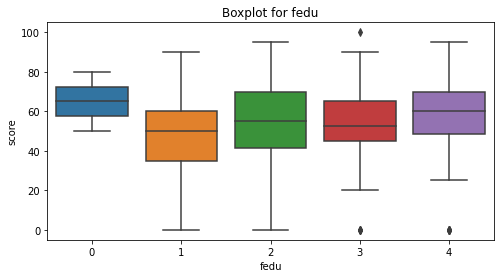

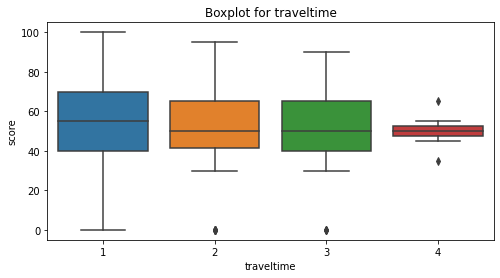

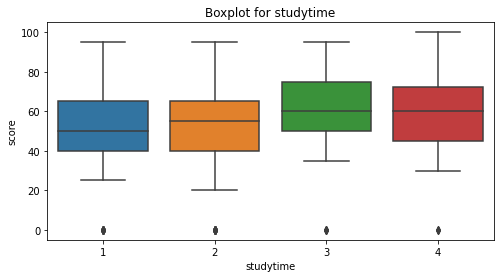

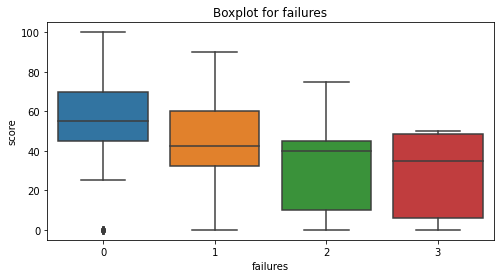

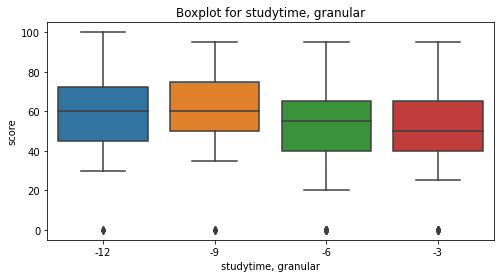

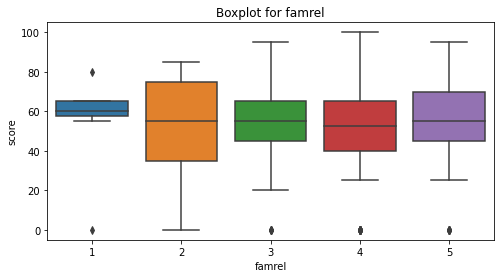

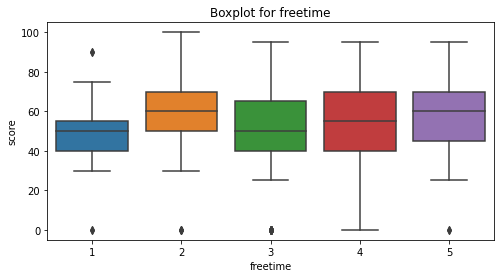

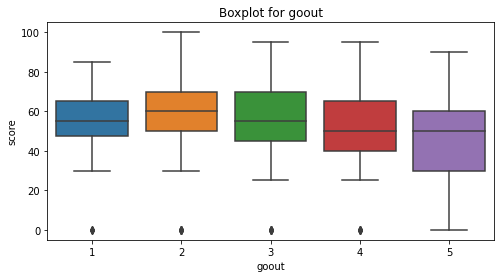

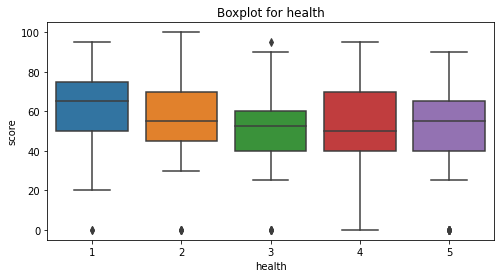

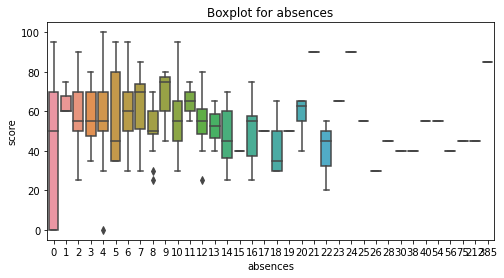

In [42]:
boxplot_type('int64', 0, -1)

# Корреляционный анализ

In [43]:
correlation = math.corr()
round(correlation, 2)

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.00,-0.15,-0.14,0.08,-0.02,0.21,0.02,0.05,0.01,0.12,-0.06,0.10,-0.16
medu,-0.15,1.00,0.59,-0.16,0.08,-0.24,-0.08,-0.01,0.04,0.07,-0.07,-0.01,0.20
fedu,-0.14,0.59,1.00,-0.12,0.01,-0.26,-0.01,-0.03,-0.02,0.05,-0.02,0.02,0.12
traveltime,0.08,-0.16,-0.12,1.00,-0.10,0.04,0.10,-0.03,-0.02,0.05,-0.04,-0.04,-0.06
studytime,-0.02,0.08,0.01,-0.10,1.00,-0.17,-1.00,0.03,-0.12,-0.05,-0.06,-0.02,0.11
failures,0.21,-0.24,-0.26,0.04,-0.17,1.00,0.17,-0.01,0.09,0.10,0.08,0.06,-0.34
"studytime, granular",0.02,-0.08,-0.01,0.10,-1.00,0.17,1.00,-0.03,0.12,0.05,0.06,0.02,-0.11
famrel,0.05,-0.01,-0.03,-0.03,0.03,-0.01,-0.03,1.00,0.16,0.06,0.10,-0.08,0.05
freetime,0.01,0.04,-0.02,-0.02,-0.12,0.09,0.12,0.16,1.00,0.29,0.07,0.01,0.02
goout,0.12,0.07,0.05,0.05,-0.05,0.10,0.05,0.06,0.29,1.00,-0.02,-0.05,-0.13


<AxesSubplot:>

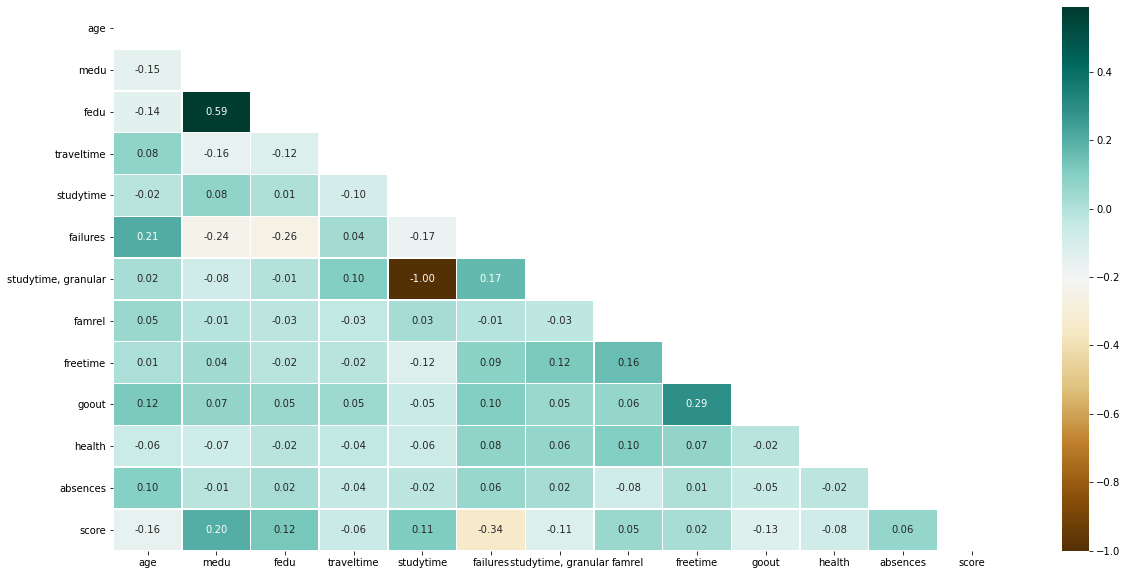

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
matrix = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap="BrBG",
            fmt='.2f', linewidths=.5, ax=ax, mask=matrix)

<AxesSubplot:>

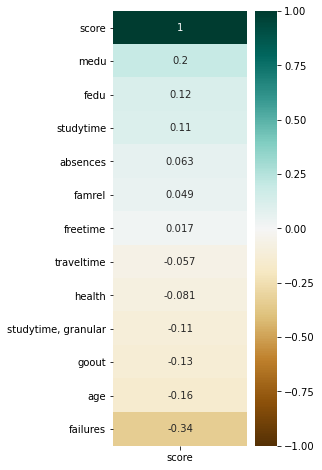

In [45]:
plt.figure(figsize=(3, 8))
sns.heatmap(correlation[['score']].sort_values(
    by='score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Анализ категориальных данных

# Диаграммы признаков

In [46]:
info_object()

,school
GP,344
MS,45


Уникальных значений: 2


,sex
F,204
M,185


Уникальных значений: 2


,address
U,306
R,83


Уникальных значений: 2


,famsize
GT3,282
LE3,107


Уникальных значений: 2


,pstatus
T,353
A,36


Уникальных значений: 2


,mjob
other,146
services,98
at_home,58
teacher,55
health,32


Уникальных значений: 5


,fjob
other,230
services,99
teacher,29
at_home,16
health,15


Уникальных значений: 5


,reason
course,152
reputation,102
home,101
other,34


Уникальных значений: 4


,guardian
mother,279
father,86
other,24


Уникальных значений: 3


,schoolsup
no,340
yes,49


Уникальных значений: 2


,famsup
yes,254
no,135


Уникальных значений: 2


,paid
no,236
yes,153


Уникальных значений: 2


,activities
yes,206
no,183


Уникальных значений: 2


,nursery
yes,312
no,77


Уникальных значений: 2


,higher
yes,370
no,19


Уникальных значений: 2


,internet
yes,334
no,55


Уникальных значений: 2


,romantic
no,266
yes,123


Уникальных значений: 2


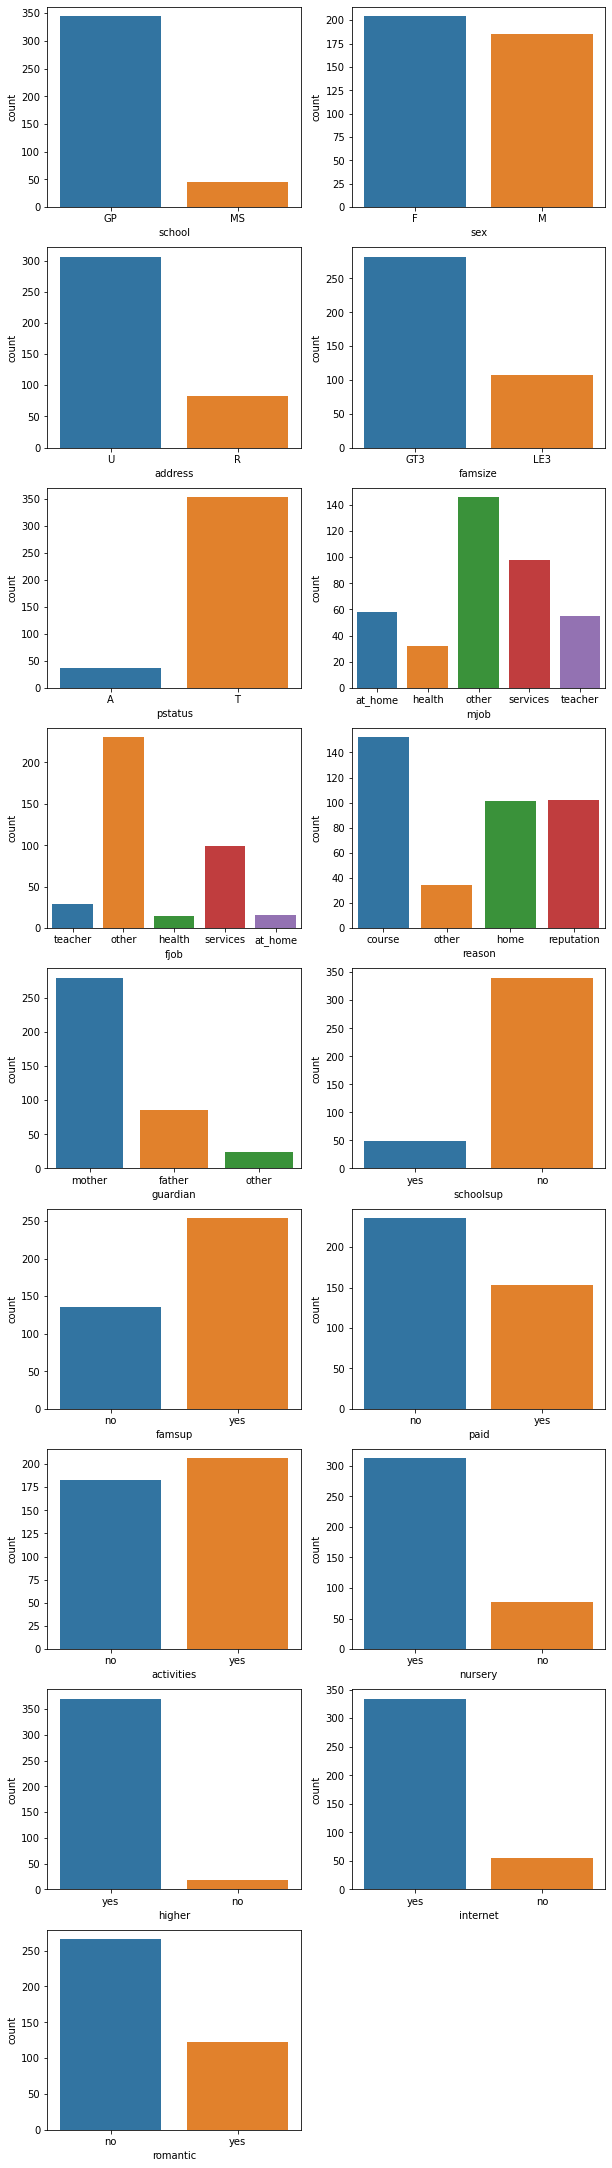

In [47]:
hist_type('object')

# Выявление выбросов

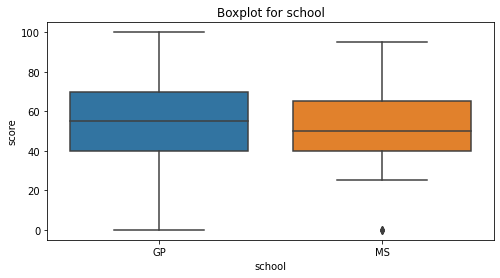

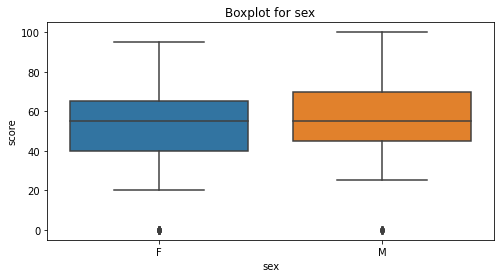

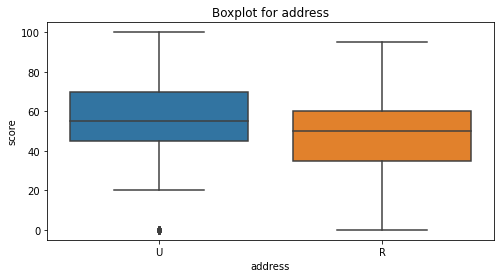

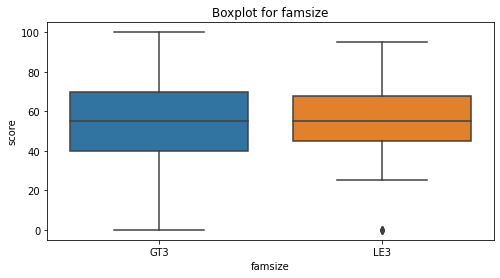

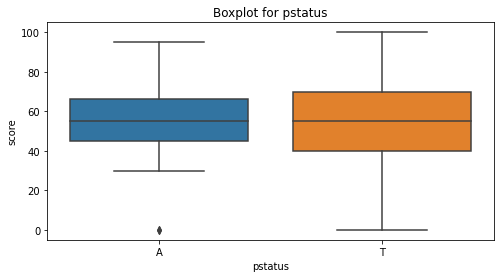

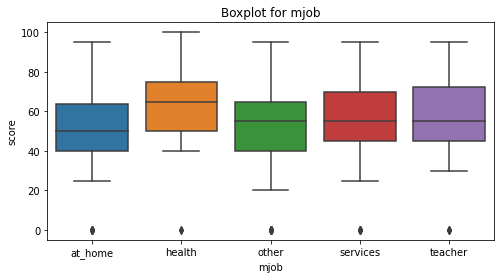

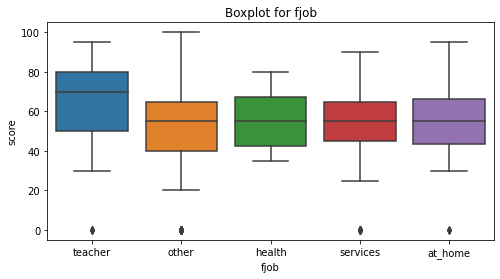

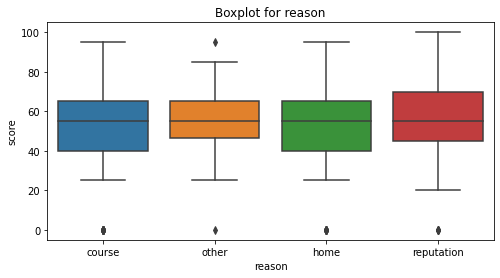

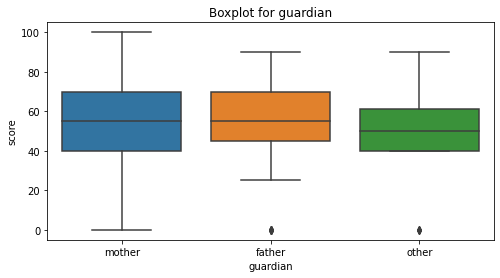

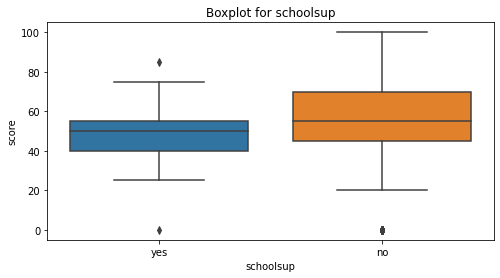

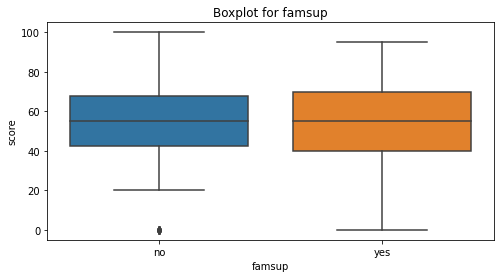

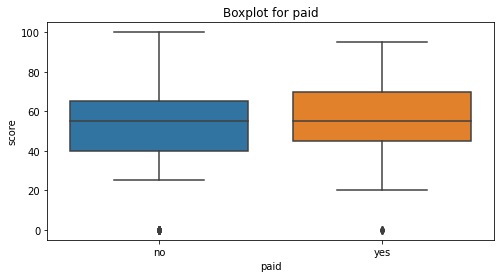

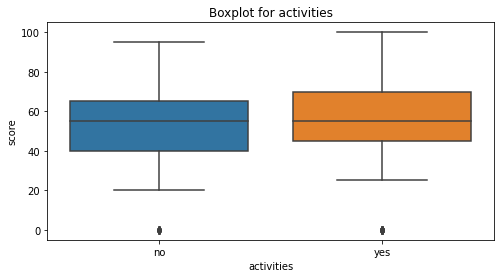

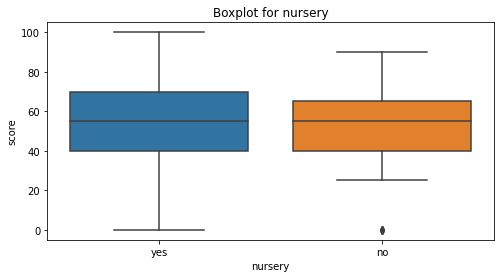

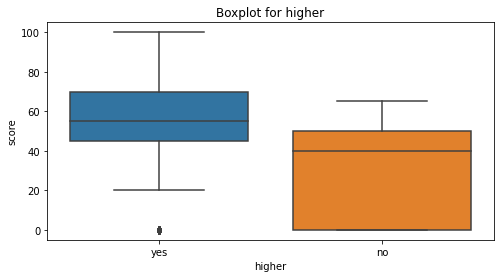

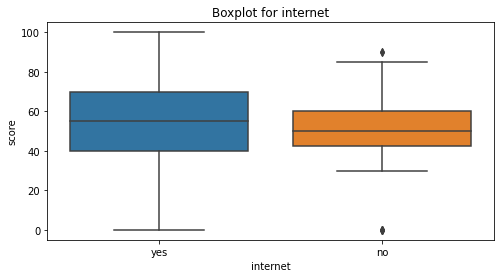

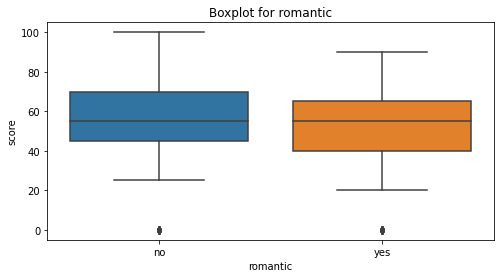

In [48]:
boxplot_type('object')

# Тест Стьюдента

In [49]:
for each in math.select_dtypes('object').columns:
    get_stat_dif(each)

Найдены статистически значимые различия для  address
Найдены статистически значимые различия для  mjob
Найдены статистически значимые различия для  higher
Найдены статистически значимые различия для  romantic


# Итоговая модель

In [50]:
math_for_model = math.loc[:, ['score', 'address', 'mjob', 'higher',
                              'romantic', 'age', 'failures', 'medu', 'famrel',
                              'traveltime', 'freetime', 'absences']]
math_for_model

,score,address,mjob,higher,romantic,age,failures,medu,famrel,traveltime,freetime,absences
0,30,U,at_home,yes,no,18,0,4,4,2,3,6
1,30,U,at_home,yes,no,17,0,1,5,1,3,4
2,50,U,at_home,yes,no,15,3,1,4,1,3,10
3,75,U,health,yes,yes,15,0,4,3,1,2,2
4,50,U,other,yes,no,16,0,3,4,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
390,45,U,services,yes,no,20,2,2,5,1,5,212
391,80,U,services,yes,no,17,0,3,2,2,4,3
392,35,R,other,yes,no,21,3,1,5,1,5,3
393,50,R,services,yes,no,18,0,3,4,3,4,0


**Выводы проекта.**

В процессе работы с сетом, дубликатов вне найдено.

При поверхностной проверке содержимого в столбцах fedu и famrel были выявлены некорректные данные. Ошибка исправлена путём замены на моду, так как показатели являются категориальными.

Также на этом же этапе обнаружена колонка studytime granular. Она оставлена для дальнейшего анализа с целью выявления на результирующую графу.

Поиск пропусков не выявил необходимости удаления каких-либо параметров, так как критического содержания пропусков (более 30%) не найдено.

В предобработке в целевом показателе score найдены строки с пропусками, поэтому они удалены. 

Показатели, где пропусков чуть более 10% оставлены для оценки дальнейшего влияния на результат.

Пропуски данных в категориальных параметрах заменены на моду, а в числовых – на медиану.

Просмотр гистограмм численных параметров выявил, что лишь некоторые показатели имеют тенденцию к нормальному распределению, такие как freetime, goout и score. Большинство параметров (age, traveltime, studytime, failures, absences) распределены с правосторонней ассиметрией, а показатели medu, studytime granular, famrel - с левосторонней. При этом параметры score и absences имеет явные аномалии.

Анализ выбросов показал, что чистых числовых данных не так много, это – medu, goout, health и score. Количество выбросов по показателям famrel и failures дают право включать их в модель на основании возможности моделирования их выбросов.

Просмотр боксплотов показал, что многие признаки нуждаются в объединении категории (age, medu, fedu, traveltime, freetime, absences), после которого они могут адекватно работать в модели. Показатели failures и famrel могут быть значимы, так имеют разную величину «усов» у категорий. Показатели studytime, studytime granular, goout, наоборот, не эффективны для модели, так как их категории имеют тенденцию к идентичности.

Корреляционный анализ показал, что studytime и studytime granular идентичны, что делает невозможным включения их обоих в модель. Также medu и fedu имеют высокий уровень корреляции (59%), который может возрасти при очистке данных и может поставить вопрос об удалении одного из них и в силу идентичности.

На целевой показатель наиболее всего влияют medu, fedu, age и failures. При этом на успеваемость ребёнка положительно влияет высокий уровень образования родителей, меньшее количество пропусков и небольшой возраст самого ребёнка.

Корреляционный анализ показывает, что большинство данных слабо связаны между собой и нуждаются в обработке. При этом, на корреляционную матрицу не повлияли ни замена пропусков на нулевые значения, ни различные варианты очистки выбросов (при удалении строк не более 10%), коэффициенты выросли не более 2%.

Просмотр диаграмм категориальных нечисловых параметров показал, что визуально выборка делиться полярно наиболее всего по таким признаком, как school, address, pstatus, fjob, schoolsup, nursery, higher, internet.

Просмотр боксплотов категориальных нечисловых параметров позволяет выбрать показатели, которые могут быть значимы для модели. Это – mjob, fjob, schoolsup, higher. Однако формализованный подход (тест Стьюдента) выделил значимыми address, mjob, higher, romantic.

Представленный вариант анализа данных носит промежуточный характер, который объясняется отсутствием необходимых знаний и навыков. На данном этапе, агрегируя все выводы, в модель следует включить score (как целевой показатель), address, mjob, higher, romantic (по результатам реализации критерия Стьюдента), age, failures, medu (по результатам корреляционного анализа), famrel (как показатель с наибольшим количеством выбросов, которые возможно моделировать), traveltime, freetime, absences (как показатели, которые могут быть значимы после объединения категорий данных).



**Комментарий для ментора.**

Код, наверно, скажет лучше меня. Вводный вебинар воодушевил, однако реализация обозначенных моментов не удалась. Курсы не дают чёткого алгоритма действий, который, наверняка, существует, поэтому долго работаешь с проектом, не зная куда бежать и что делать.
